<a href="https://colab.research.google.com/github/line-coder/NID-card-tempering-detection/blob/main/NID_Card_Tampering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NID Card Tampering Detection

#### The purpose of this project is to detect tampering of NID card using computer vision. This project will help different organization in detecting whether the Id i.e. the NID card provided to them by thier employees or customers or anyone is original or not.

#### For this project we will calculate structural similarity of original NID card and the NID card uploaded by user.

In [ ]:
# import the necessary packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests
from io import BytesIO

In [ ]:
def convert_to_jpg(image_url, save_path):
    response = requests.get(image_url, stream=True)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        img = img.convert("RGB")
        img.save(save_path, "JPEG")
        print(f"Converted and saved: {save_path}")
    else:
        print(f"Failed to load image: {image_url}")

In [ ]:
image_url_1 = "/content/nid_1.jpg"
image_url_2 = "/content/nid_2.jpg"

In [ ]:
from PIL import Image
image_path_1 = "/content/nid_1.jpg"
image_path_2 = "/content/nid_2.jpg"

original = Image.open(image_path_1).convert("RGB")
tampered = Image.open(image_path_2).convert("RGB")


original.save("converted_nid_1.jpg", "JPEG")
tampered.save("converted_nid_2.jpg", "JPEG")

print("Images converted and saved successfully!")



Images converted and saved successfully!


#### Loading original and user provided images.

In [ ]:
# The file format of the source file.
print("Original image format : ",original.format)
print("Tampered image format : ",tampered.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size)
print("Tampered image size : ",tampered.size)

Original image format :  None
Tampered image format :  None
Original image size :  (250, 160)
Tampered image size :  (250, 160)


#### Converting the format of  tampered image similar to original image.

In [ ]:
# Resize Image
original = original.resize((250, 160))
print(original.size)
original.save('/content/nid_1.jpg')#Save image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('/content/nid_2.jpg')#Saves image

(250, 160)
(250, 160)


####  Here, we checked the format and size of the original and tampered image.

In [ ]:
# Change image type if required from png to jpg
tampered = Image.open('/content/nid_2.jpg')
tampered.save('/content/nid_2.jpg')#can do png to jpg

#### Converting the size of tampered and original image.

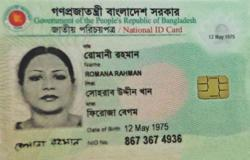

In [ ]:
# Display original image
original

#### Orginial NID card image used for comparision.

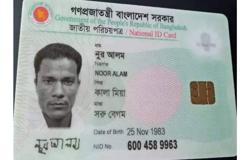

In [ ]:
# Display user given image
tampered

#### User provided image which will be compared with NID card.

#### Converting images into grayscale using opencv. Because in image processing many applications doesn't help us in identifying the important, edges of the coloured images also coloured images are bit complex to understand by machine beacuse they have 3 channel while grayscale has only 1 channel.  

In [ ]:
import cv2
from skimage.metrics import structural_similarity as ssim

# Load the two input images in grayscale
original = cv2.imread("/content/nid_1.jpg")
tampered = cv2.imread("/content/nid_2.jpg")

# Convert to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

# Resize tampered image to match the original's dimensions
tampered_gray = cv2.resize(tampered_gray, (original_gray.shape[1], original_gray.shape[0]))

# Compute SSIM
(score, diff) = ssim(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")

print("SSIM: {:.4f}".format(score))


SSIM: 0.2982


#### Structural similarity index helps us to determine exactly where in terms of x,y coordinates location, the image differences are. Here, we are trying to find similarities between the original and tampered image. The lower the SSIM score lower is the similarity.

In [ ]:
# Calculating threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

#### Here we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transforms the grayscale image into a binary image using a mathematical formula.
#### Find contours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and recoginition. Grab contours grabs the appropriate value of the contours.

In [ ]:
# loop over the contours
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

#### Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. We compute the bounding box of the contour and then draw the bounding box on both input images to represent where the two images are different or not.

Original Format Image


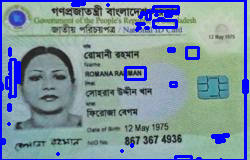

In [ ]:
#Diplay original image with contour
print('Original Format Image')
Image.fromarray(original)

Different Image


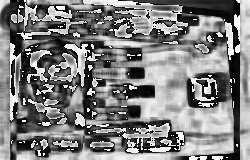

In [ ]:
#Diplay difference image with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


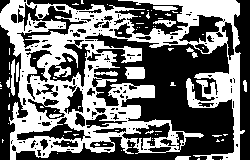

In [ ]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

### Summary

#### Finding out structural similarity of the images helped us in finding the difference or similarity in the shape of the images. Similarly, finding out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition.
#### As, our SSIM is ~31.2% we can say that the image user provided is fake or tampered.
#### Finally we visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold.  

### Scope

#### This project can be used in different organizations where customers or users need to provide any kind of id in order to get themselves verified. The organization can use this project to find out whether the ID is original or fake. Similarly this can be used for any type of ID.